In [1]:
from helpers.helpers import get_dataset, create_train_test_validation_data, plot_random_image_sample, plot_random_predicted_image_sample
from model.cnn_model import create_CNN_model

In [2]:
# Dataset is a 2D array with values (1 row(image) contains 28 values) from 0 (white) - 255 (black)
# Load dataset and store it in a variable and get basic dataset information
dataset = get_dataset()

Dataset Size: 70000
Images have a shape: (28, 28)


In [3]:
# Assign dataset to variables - each image has dimensions (28, 28)
X_train, y_train, X_test, y_test, X_val, y_val = create_train_test_validation_data(dataset)

# Print X shapes
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"X_val Shape: {X_val.shape}")

# Print y shapes
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")
print(f"y_val Shape: {y_val.shape}")

X_train Shape: (11900, 28, 28)
X_test Shape: (56000, 28, 28)
X_val Shape: (2100, 28, 28)
y_train Shape: (11900,)
y_test Shape: (56000,)
y_val Shape: (2100,)


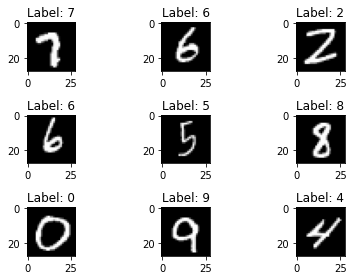

In [4]:
plot_random_image_sample(X_train[:20], y_train[:20])

In [5]:
predictions = create_CNN_model(X_train, y_train, X_test, y_test, X_val, y_val)

1750/1750 [==============================] - 1s 636us/step - loss: 0.6260 - accuracy: 0.9414
Test accuracy: 0.9413928389549255


1 - Test for trained model


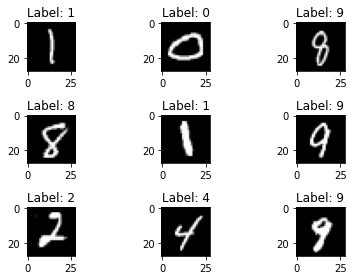

2 - Test for trained model


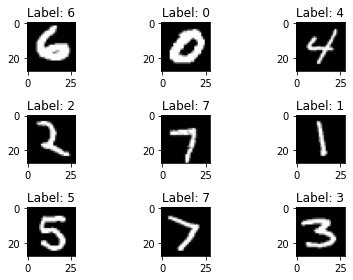

3 - Test for trained model


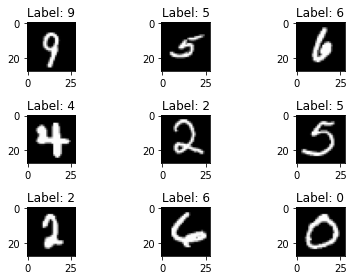

In [7]:
print("1 - Test for trained model")
plot_random_predicted_image_sample(X_test, predictions)

print("2 - Test for trained model")
plot_random_predicted_image_sample(X_test, predictions)

print("3 - Test for trained model")
plot_random_predicted_image_sample(X_test, predictions)